In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 14
import time, copy,os
from numpy import pi, sin, cos, tan
import control
from numpy.fft import fft

In [1]:
import os

In [3]:
import pylab_util as PU

In [4]:
import serial

In [5]:
import serial_utils

In [6]:
import importlib

In [7]:
importlib.reload(serial_utils)

<module 'serial_utils' from '/home/pi/git/research/serial_utils.py'>

In [8]:
import re

In [9]:
p = re.compile("^[0-9.]+,.*")

In [10]:
def data_to_float_array(data):
    mylist = data.split('\n')

    for i, rowstr in enumerate(mylist):
        if p.search(rowstr) is not None:
            #this is the start row
            start_ind = i
            break
                
    # search backwards for '#end'
    N = len(mylist)
    for i in range(1,N):
        ind = N-i
        rowstr = mylist[ind]
        if p.search(rowstr) is not None:
            end_ind = ind
            break
    
    clean_list = mylist[start_ind:end_ind]
    clean_2 = list(filter(None,clean_list))
    nested_list = [row.split(',') for row in clean_2]
    str_array = np.array(nested_list)
    float_array = str_array.astype(float)
    return float_array

In [11]:
pwd

'/home/pi/sabbatical_github/cart_pendulum/arduino_only'

In [13]:
ls /dev/ttyACM*

/dev/ttyACM0


## Get the portname

In [14]:
for i in range(10):
    portname = "/dev/ttyACM%i" % i
    if os.path.exists(portname):
        break
print("portname: %s" % portname)

portname: /dev/ttyACM0


In [15]:
ser = serial_utils.serial_test(portname)

In [16]:
ser.open()

In [17]:
ser.print_all()

Cart Pendulum Line Follow 3
using rtblockdiagram library
enter any character to calibrate



In [18]:
ser.flush()

In [24]:
ser.write_char('s')

In [29]:
ser.write_float(0.1)

In [30]:
ser.print_all()

PD_block.Kp = 0.10
enter PD_block.Kd



In [31]:
ser.write_float(0.001)

In [32]:
ser.print_all()

PD_block.Kd = 0.00
enter v_nom_block.value



In [33]:
ser.write_int(325)

In [34]:
ser.print_all()

v_nom_block.value = 325
enter t_stop



In [35]:
ser.write_float(10)

In [36]:
data = ser.get_data()

In [37]:
data2 = ser.get_data()

In [38]:
data += data2

In [39]:
print(data)

t_stop = 10.00
t0 =162120296
0.64,3500,353,150,475,175,400,175,3,4657
12.78,-1157,-499,-150,175,475,175,400,3,4654
24.97,-1154,-115,-115,210,440,210,400,4,4555
37.18,-1055,-97,-97,228,422,228,400,5,4594
49.30,-1094,-112,-112,213,437,213,400,8,4544
61.49,-1044,-100,-100,225,425,225,400,12,4511
73.74,-1011,-98,-98,227,423,227,400,16,4406
85.90,-906,-81,-81,244,406,244,400,22,4252
98.02,-752,-62,-62,263,387,263,387,29,4075
110.08,-575,-42,-42,283,367,283,367,36,3856
122.18,-356,-17,-17,308,342,308,342,44,3603
134.30,-103,10,10,335,315,335,315,52,3448
146.39,52,18,18,343,307,343,307,59,3205
158.42,295,49,49,374,276,374,276,67,2958
170.53,542,74,74,399,251,399,251,75,2834
182.61,666,76,76,401,249,400,249,82,2635
194.71,865,102,102,427,223,400,223,89,2569
206.93,931,98,98,423,227,400,227,95,2469
219.05,1031,111,111,436,214,400,214,101,2392
231.36,1108,117,117,442,208,400,208,107,2389
243.68,1111,111,111,436,214,400,214,111,2384
256.01,1116,112,112,437,213,400,213,115,2409
268.35,1091,107,107

In [41]:
float_array = data_to_float_array(data)

In [42]:
float_array[0:20,:]

array([[ 6.4000e-01,  3.5000e+03,  3.5300e+02,  1.5000e+02,  4.7500e+02,
         1.7500e+02,  4.0000e+02,  1.7500e+02,  3.0000e+00,  4.6570e+03],
       [ 1.2780e+01, -1.1570e+03, -4.9900e+02, -1.5000e+02,  1.7500e+02,
         4.7500e+02,  1.7500e+02,  4.0000e+02,  3.0000e+00,  4.6540e+03],
       [ 2.4970e+01, -1.1540e+03, -1.1500e+02, -1.1500e+02,  2.1000e+02,
         4.4000e+02,  2.1000e+02,  4.0000e+02,  4.0000e+00,  4.5550e+03],
       [ 3.7180e+01, -1.0550e+03, -9.7000e+01, -9.7000e+01,  2.2800e+02,
         4.2200e+02,  2.2800e+02,  4.0000e+02,  5.0000e+00,  4.5940e+03],
       [ 4.9300e+01, -1.0940e+03, -1.1200e+02, -1.1200e+02,  2.1300e+02,
         4.3700e+02,  2.1300e+02,  4.0000e+02,  8.0000e+00,  4.5440e+03],
       [ 6.1490e+01, -1.0440e+03, -1.0000e+02, -1.0000e+02,  2.2500e+02,
         4.2500e+02,  2.2500e+02,  4.0000e+02,  1.2000e+01,  4.5110e+03],
       [ 7.3740e+01, -1.0110e+03, -9.8000e+01, -9.8000e+01,  2.2700e+02,
         4.2300e+02,  2.2700e+02,  4.0000e+02

```
  print_comma_then_int(sum1_block.read_output());
   print_comma_then_int(PD_block.read_output());
   print_comma_then_int(sat2_block.read_output());
   print_comma_then_int(add_block1.read_output());
   print_comma_then_int(subtract_block1.read_output());
   print_comma_then_int(satP.read_output());
   print_comma_then_int(satN.read_output());
   print_comma_then_int(pend_enc.read_output());
   print_comma_then_int(line_sense.read_output());

```

In [43]:
lc = float_array[:,1]

In [44]:
v_sat = float_array[:,2]

In [45]:
vib_on = float_array[:,3]

In [46]:
v_sent = float_array[:,4]

In [47]:
enc = float_array[0:,-1]

In [48]:
t = float_array[:,0]

In [49]:
if t[0] > 500:
    t[0] = 0

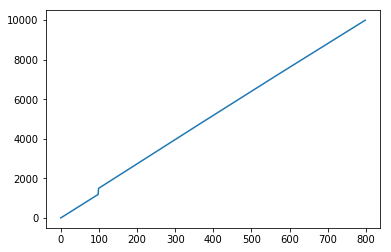

In [50]:
plt.figure()
plt.plot(t)

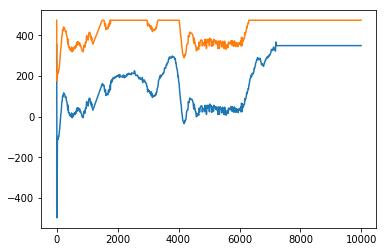

In [51]:
plt.plot(t,v_sat,t,v_sent)

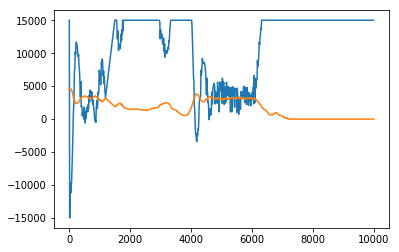

In [52]:
plt.plot(t,vib_on*100, t, enc)

In [53]:
dt_array = t[1:]-t[0:-1]

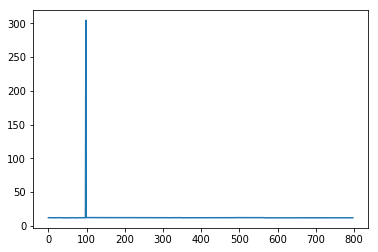

In [54]:
plt.figure()
plt.plot(dt_array)

In [159]:
v_in = float_array[:,-2]
v_out = float_array[:,-1]

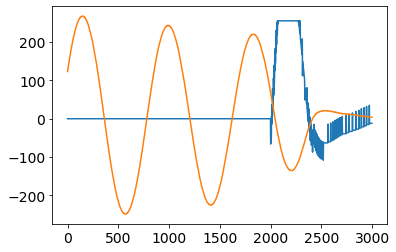

In [160]:
plt.figure()
plt.plot(t, v_in, t, v_out)
#plt.ylim([-5,260])
#plt.xlim([0,2000])
#plt.legend(['ax','ay','az'])

In [127]:
ser.close()

In [128]:
data_out = float_array

In [129]:
data_out.shape

(1500, 3)